In [2]:
library(dplyr)
library(igraph)

In [32]:
# Load the data
files <- list.files("../../data/task_44/networks")
files <- files[grep("^[A-Za-z]{3}_nodes.csv$|^[A-Za-z]{3}_edges.csv$", files)]
countries <- unique(sub("_nodes.csv$|_edges.csv$", "", files))

In [65]:
country <- sample(countries, 1) # To be replaced with a loop over all countries
print(country)

# Load and select nodes and edges
nodes <- read.csv(paste0("../../data/task_44/networks/", country, "_nodes.csv"))
nodes <- nodes |> select(nodeID, longitude, latitude)
edges <- read.csv(paste0("../../data/task_44/networks/", country, "_edges.csv"))
edges <- edges |> select(nodeID_from, nodeID_to)

[1] "NLD"


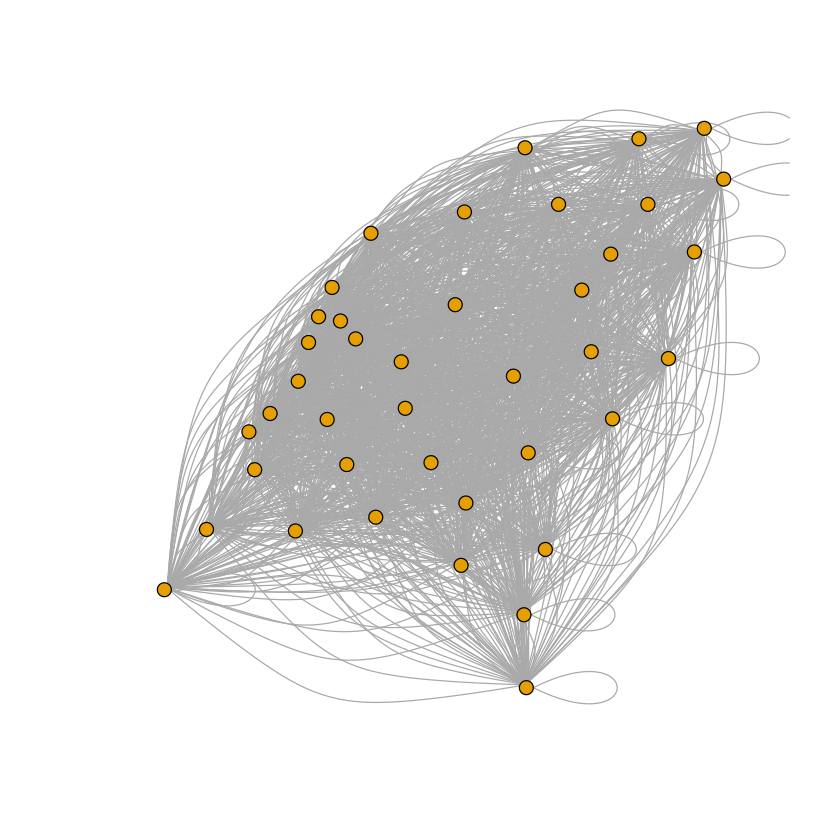

In [66]:
# Create the graph
g <- graph_from_data_frame(edges, directed = FALSE, vertices = nodes)

layout <- matrix(c(nodes$longitude, nodes$latitude), ncol = 2, byrow = FALSE)
plot(g, layout = layout, vertex.size = 5, vertex.label = NA, edge.arrow.size = 0.5)

In [49]:
# Extract analytics from the graph
n_nodes <- vcount(g)
diameter <- diameter(g) # equal to 1 for complete graphs


In [72]:
res <- data.frame()

for (country in countries){
  # Load and select nodes and edges
  nodes <- read.csv(paste0("../../data/task_44/networks/", country, "_nodes.csv"))
  nodes <- nodes |> select(nodeID, longitude, latitude)
  edges <- read.csv(paste0("../../data/task_44/networks/", country, "_edges.csv"))
  edges <- edges |> select(nodeID_from, nodeID_to)

  # Create the graph
  g <- graph_from_data_frame(edges, directed = FALSE, vertices = nodes)

  n_nodes <- vcount(g)
  diameter <- diameter(g) # equal to 1 for complete graphs

  res <- rbind(res, 
         data.frame(country = country, n_nodes = n_nodes, diameter = diameter))
  
}

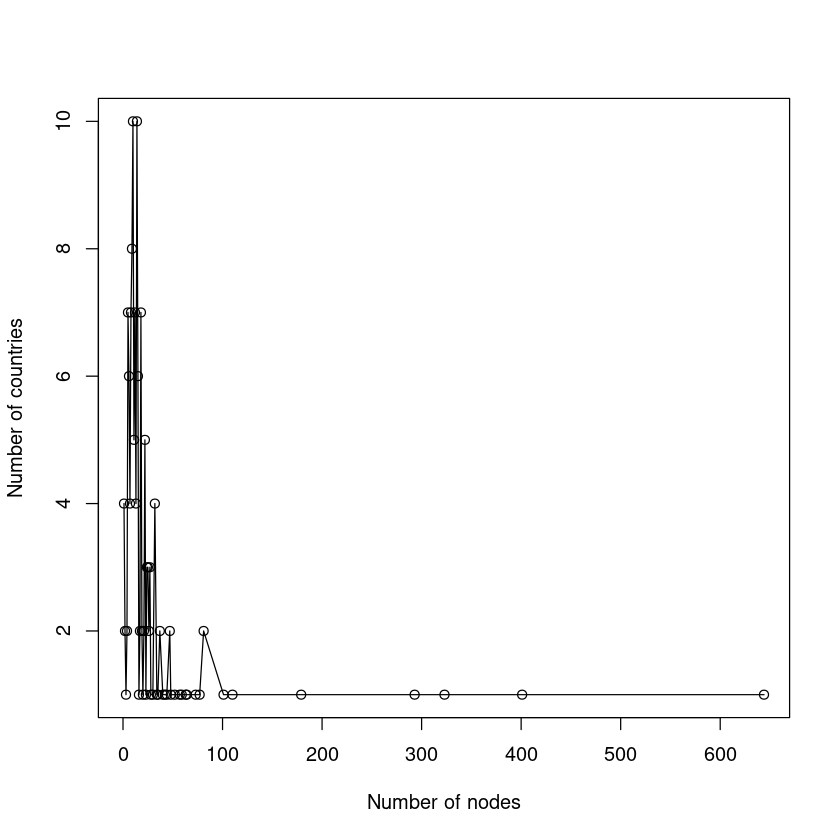

In [80]:
nodes_count <- res |> group_by(n_nodes) |> summarise(count = n())

plot(nodes_count$n_nodes, nodes_count$count, type = "o", xlab = "Number of nodes", ylab = "Number of countries")